In [1]:
# import necessary packages
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load(open("camera_cal/wide_dist_pickle.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [3]:
# Read in an image
img = cv2.imread('test_images/test2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Undistortion

Text(0.5,1,'Undistorted Image')

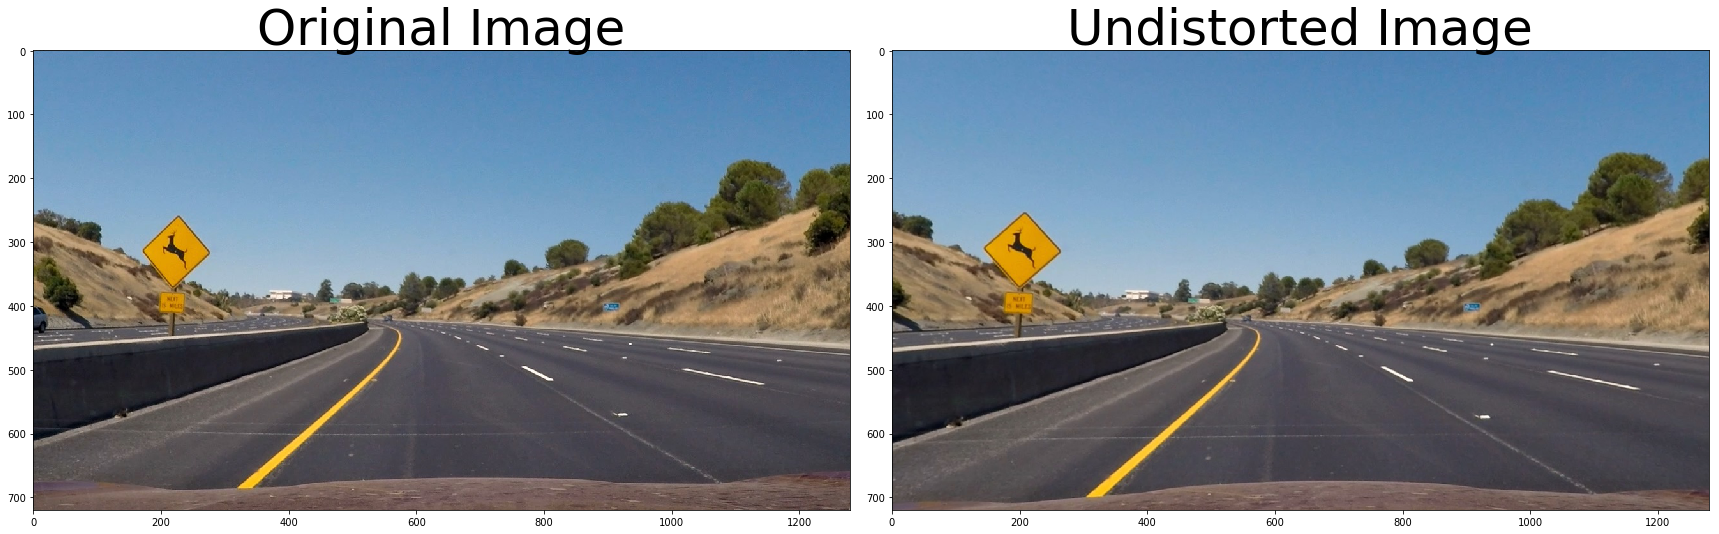

In [4]:
# Use the OpenCV undistort() function to remove distortion
undist = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test2_undist.jpg', undist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)

## Perspective Transformation

Text(0.5,1,'Warped Image')

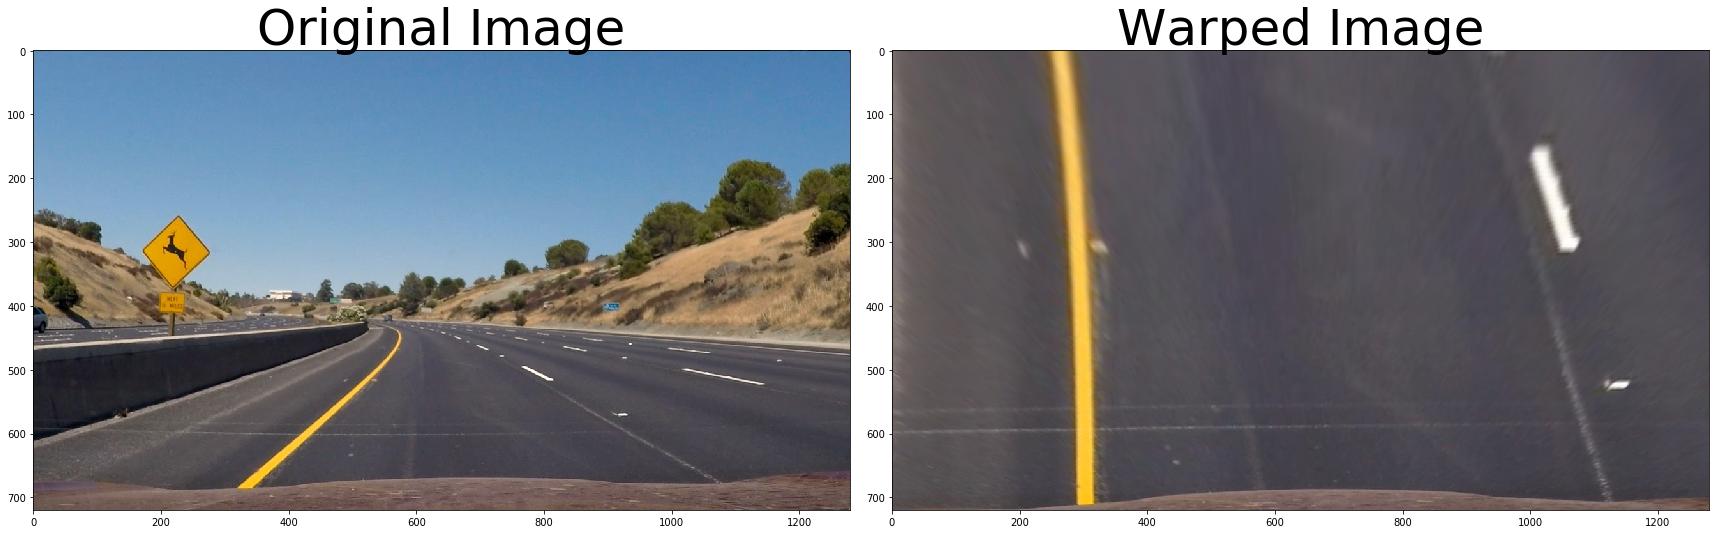

In [5]:
offset = 10 # offset for src points
# Grab the image shape
img_size = (img.shape[1], img.shape[0])
# Set the source and destination points
src = np.float32([[(0, img_size[1]-offset), (490, 480), (820, 480), (img_size[0],img_size[1]-offset)]])
dst = np.float32([[(0,img_size[1]), (0, 0), (img_size[0], 0), (img_size[0],img_size[1])]])
# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
# calculate inverse perspective transform matrix
Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(undist, M, img_size)
cv2.imwrite('output_images/test2_warped.jpg', warped)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=50)